# Term Deposit Subscription by a Client

## Problem Statement:
The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on.

## Data Definition:
#### Input variables:

1) age (numeric)

2) job: type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3) marital:    marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education: (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')

5) default: has credit in default? (categorical: 'no','yes','unknown')

6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) loan: has personal loan? (categorical: 'no','yes','unknown')

8) contact: contact communication type (categorical: 'cellular','telephone')

9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) euribor3m: euribor 3 month rate - daily indicator (numeric)

20) nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21) y - has the client subscribed a term deposit? (binary: 'yes','no')

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
# delimeter=';' or sep=';'
df = pd.read_csv('bank_data.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [3]:
df1=df.copy()
df1.shape

(41188, 21)

In [4]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Checking Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df1.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

<b>1. For getting the statistical summary of numerical variables we use the describe()

In [7]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the age ranges from 17 to 98, with mean 40.02

In [8]:
df1.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548



- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'job'<br></b>
count: Number of observations = 41188<br>
unique: Number of unique classes in the column = 12 classes<br>
top: The most occurring class = admin<br>
frequency: Frequency of the most repeated class; out of 41188 observations admin has a frequency of 10422<br>

### Checking for null values and duplicates

In [9]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df1.duplicated().sum()

12

In [11]:
df1.drop_duplicates(inplace=True)
df1.shape

(41176, 21)

### Univariate Data Analysis

In [12]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

housing
yes        21571
no         18615
unknown      990
Nam

## Segregating numbers and categorical data

### Numerical Columns

In [13]:
df1_numerical= df1.select_dtypes(include='number')
df1_numerical.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Boxplots

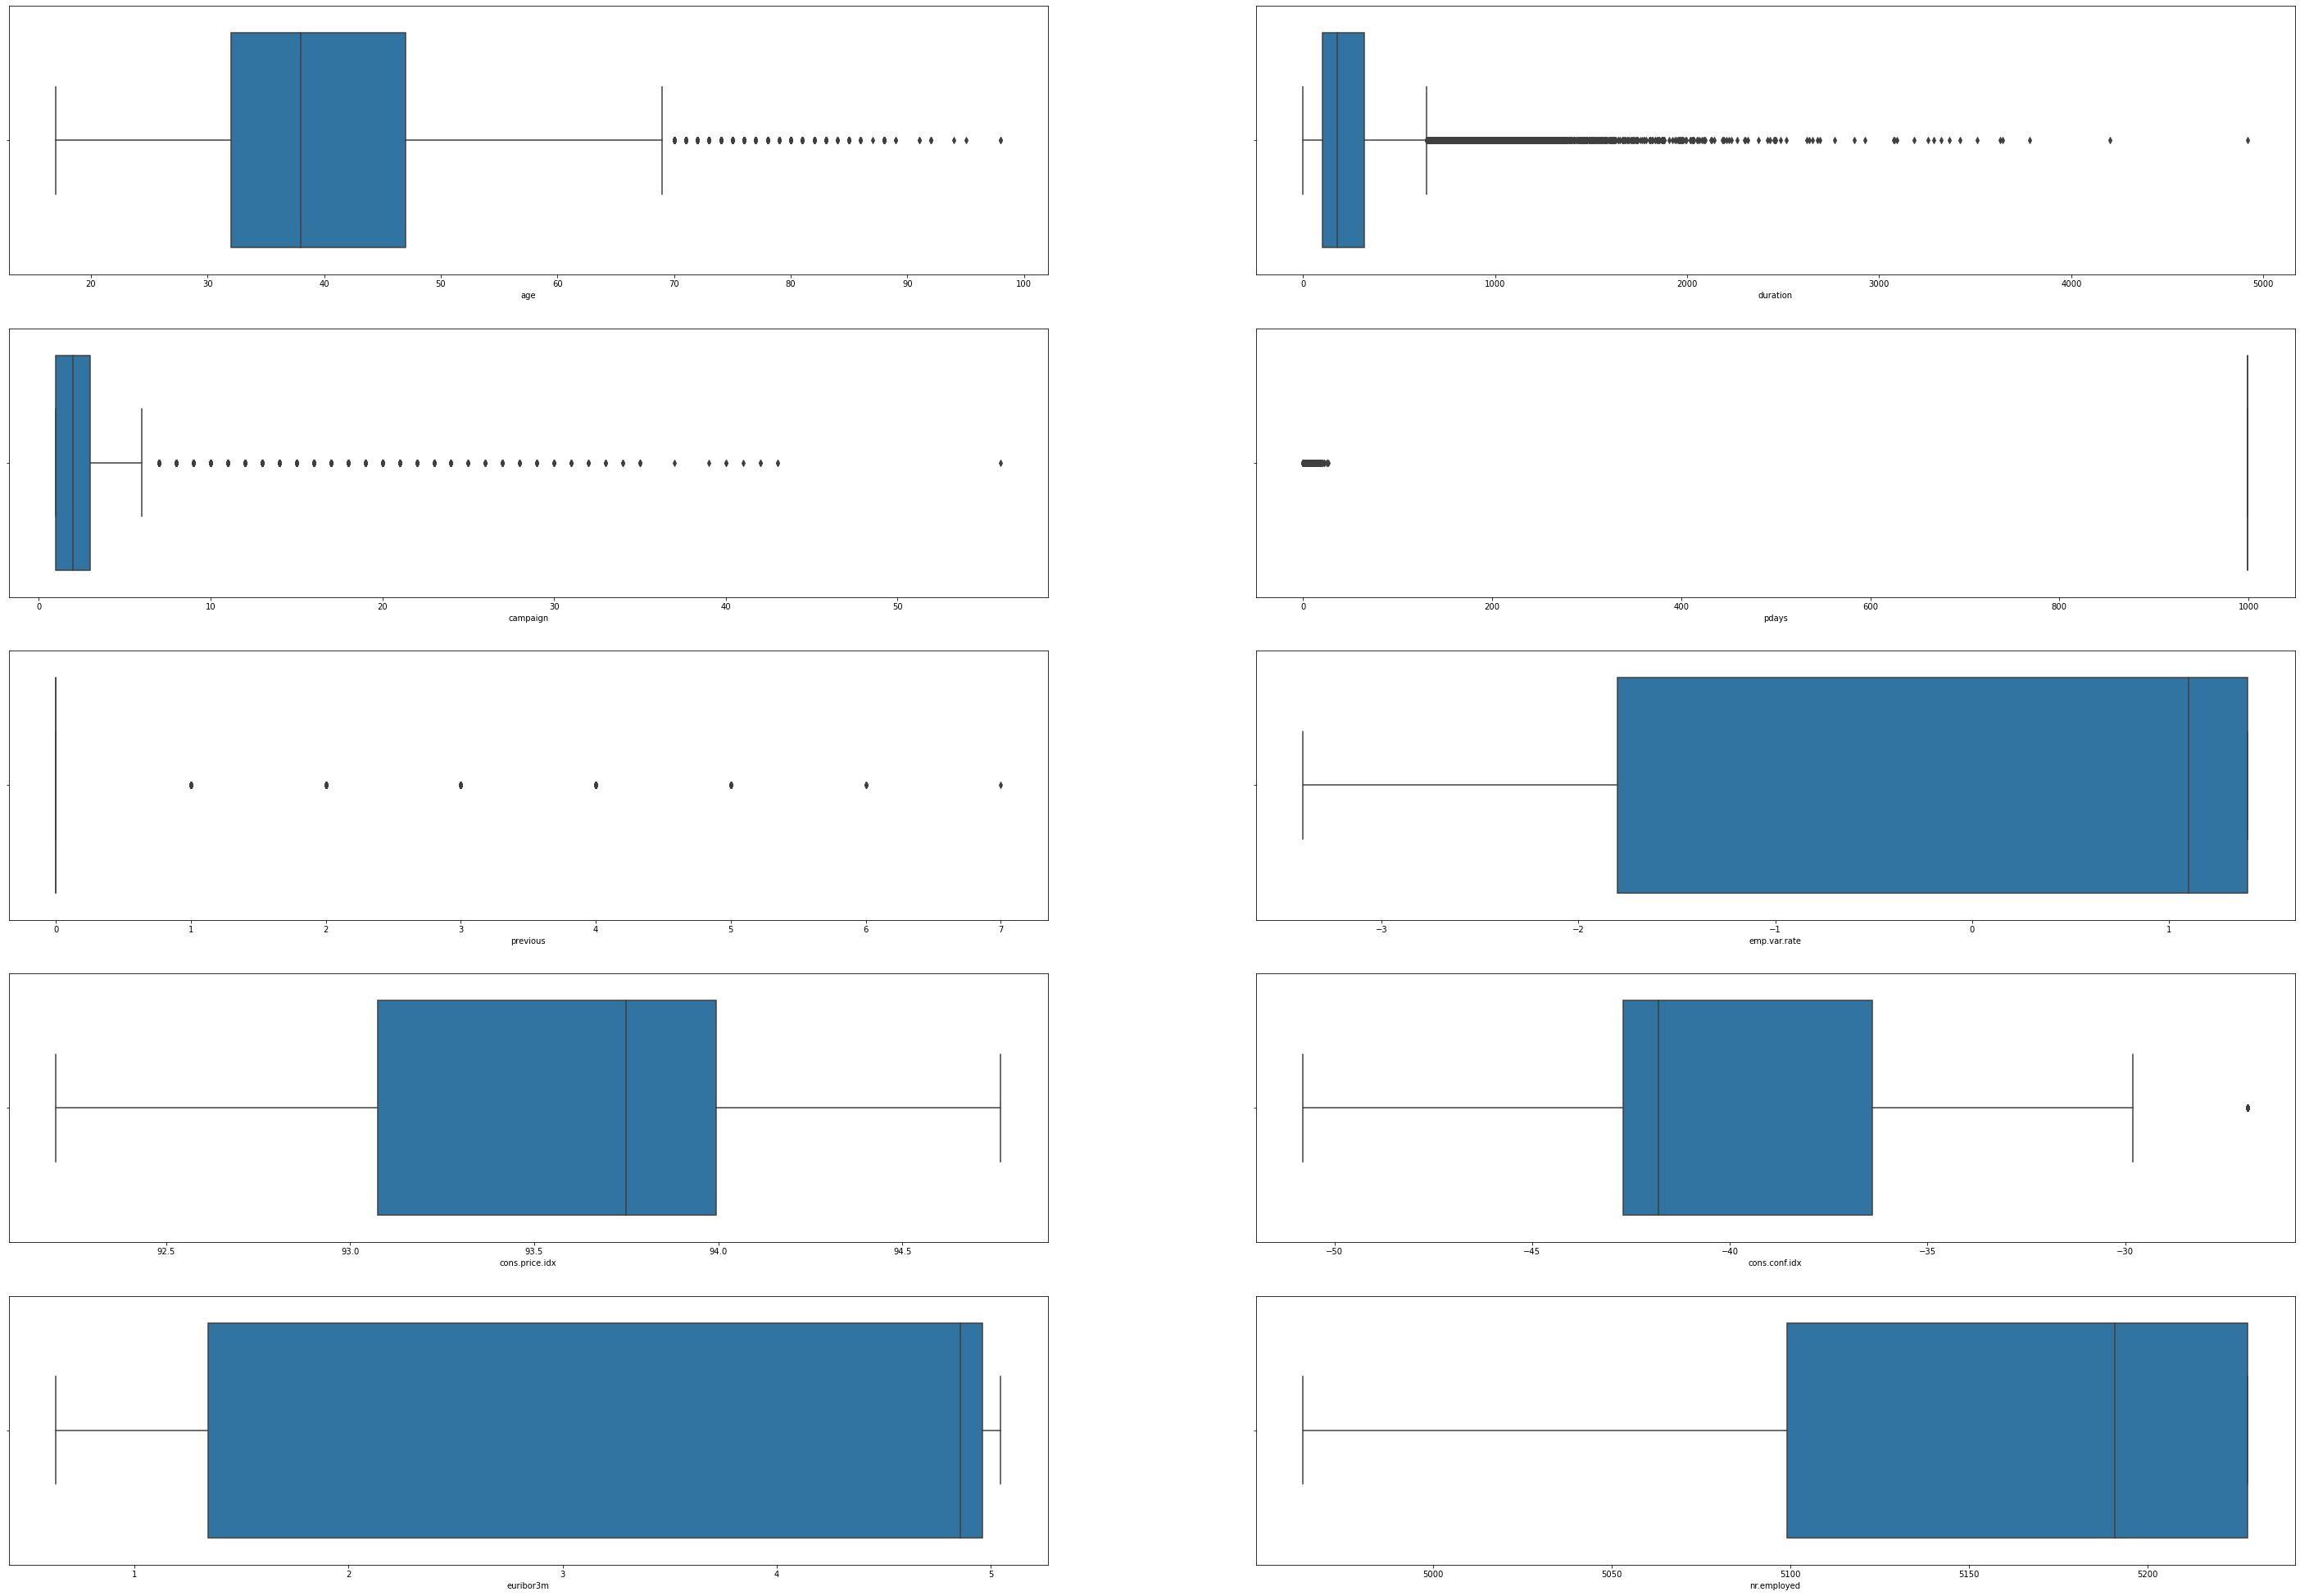

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (50, 35))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

- We can see presence of outliers in a few columns: age, duration, campaign, previous, cons.conf.idx

### Histogram

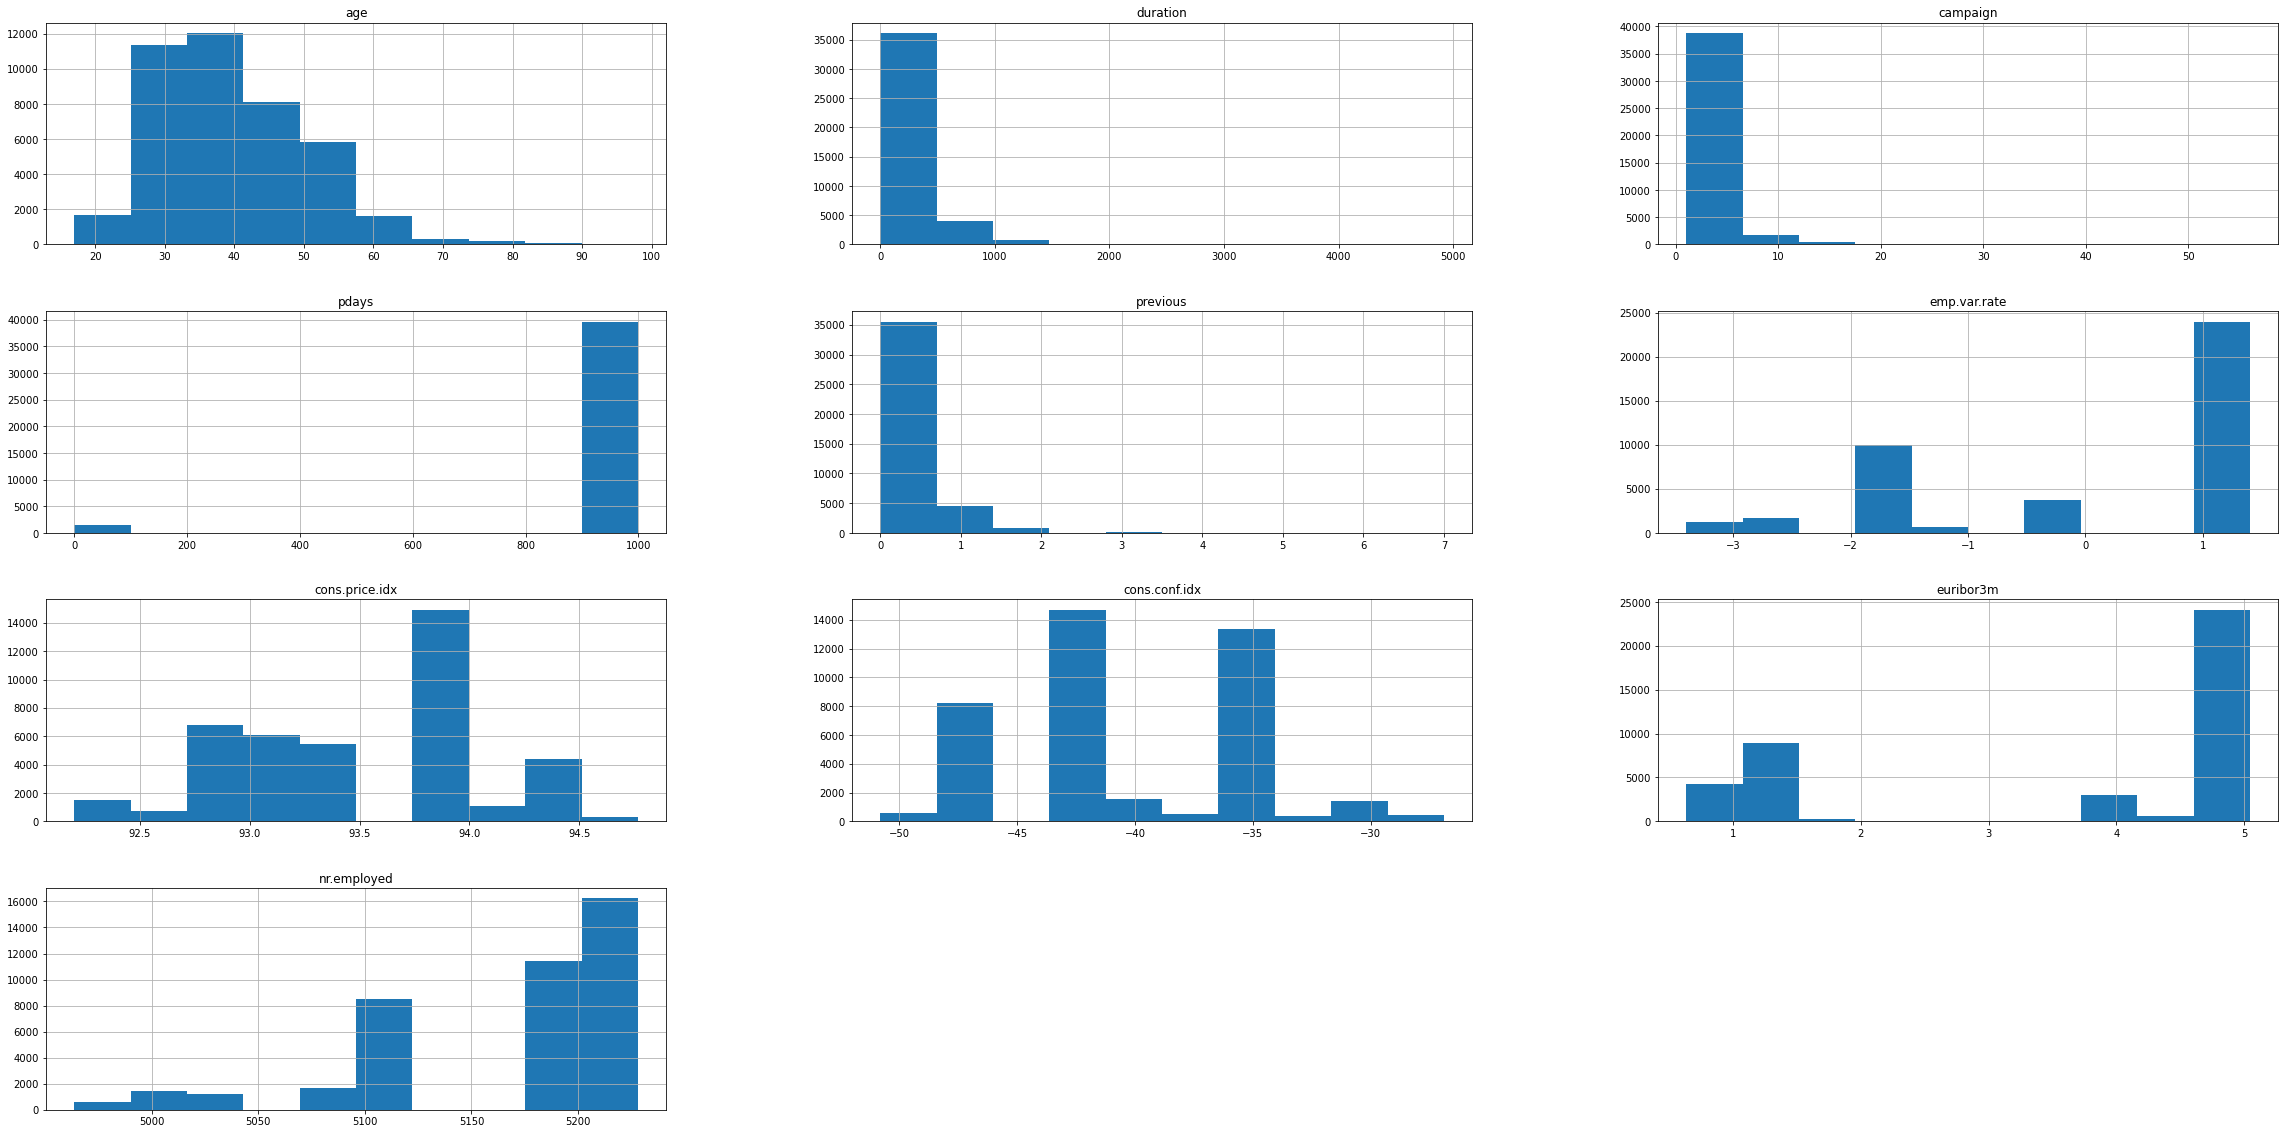

In [15]:
a=df1_numerical.hist(figsize=(40,20))

### Categorical Columns

In [16]:
df1_categorical= df1.select_dtypes(exclude='number')
df1_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

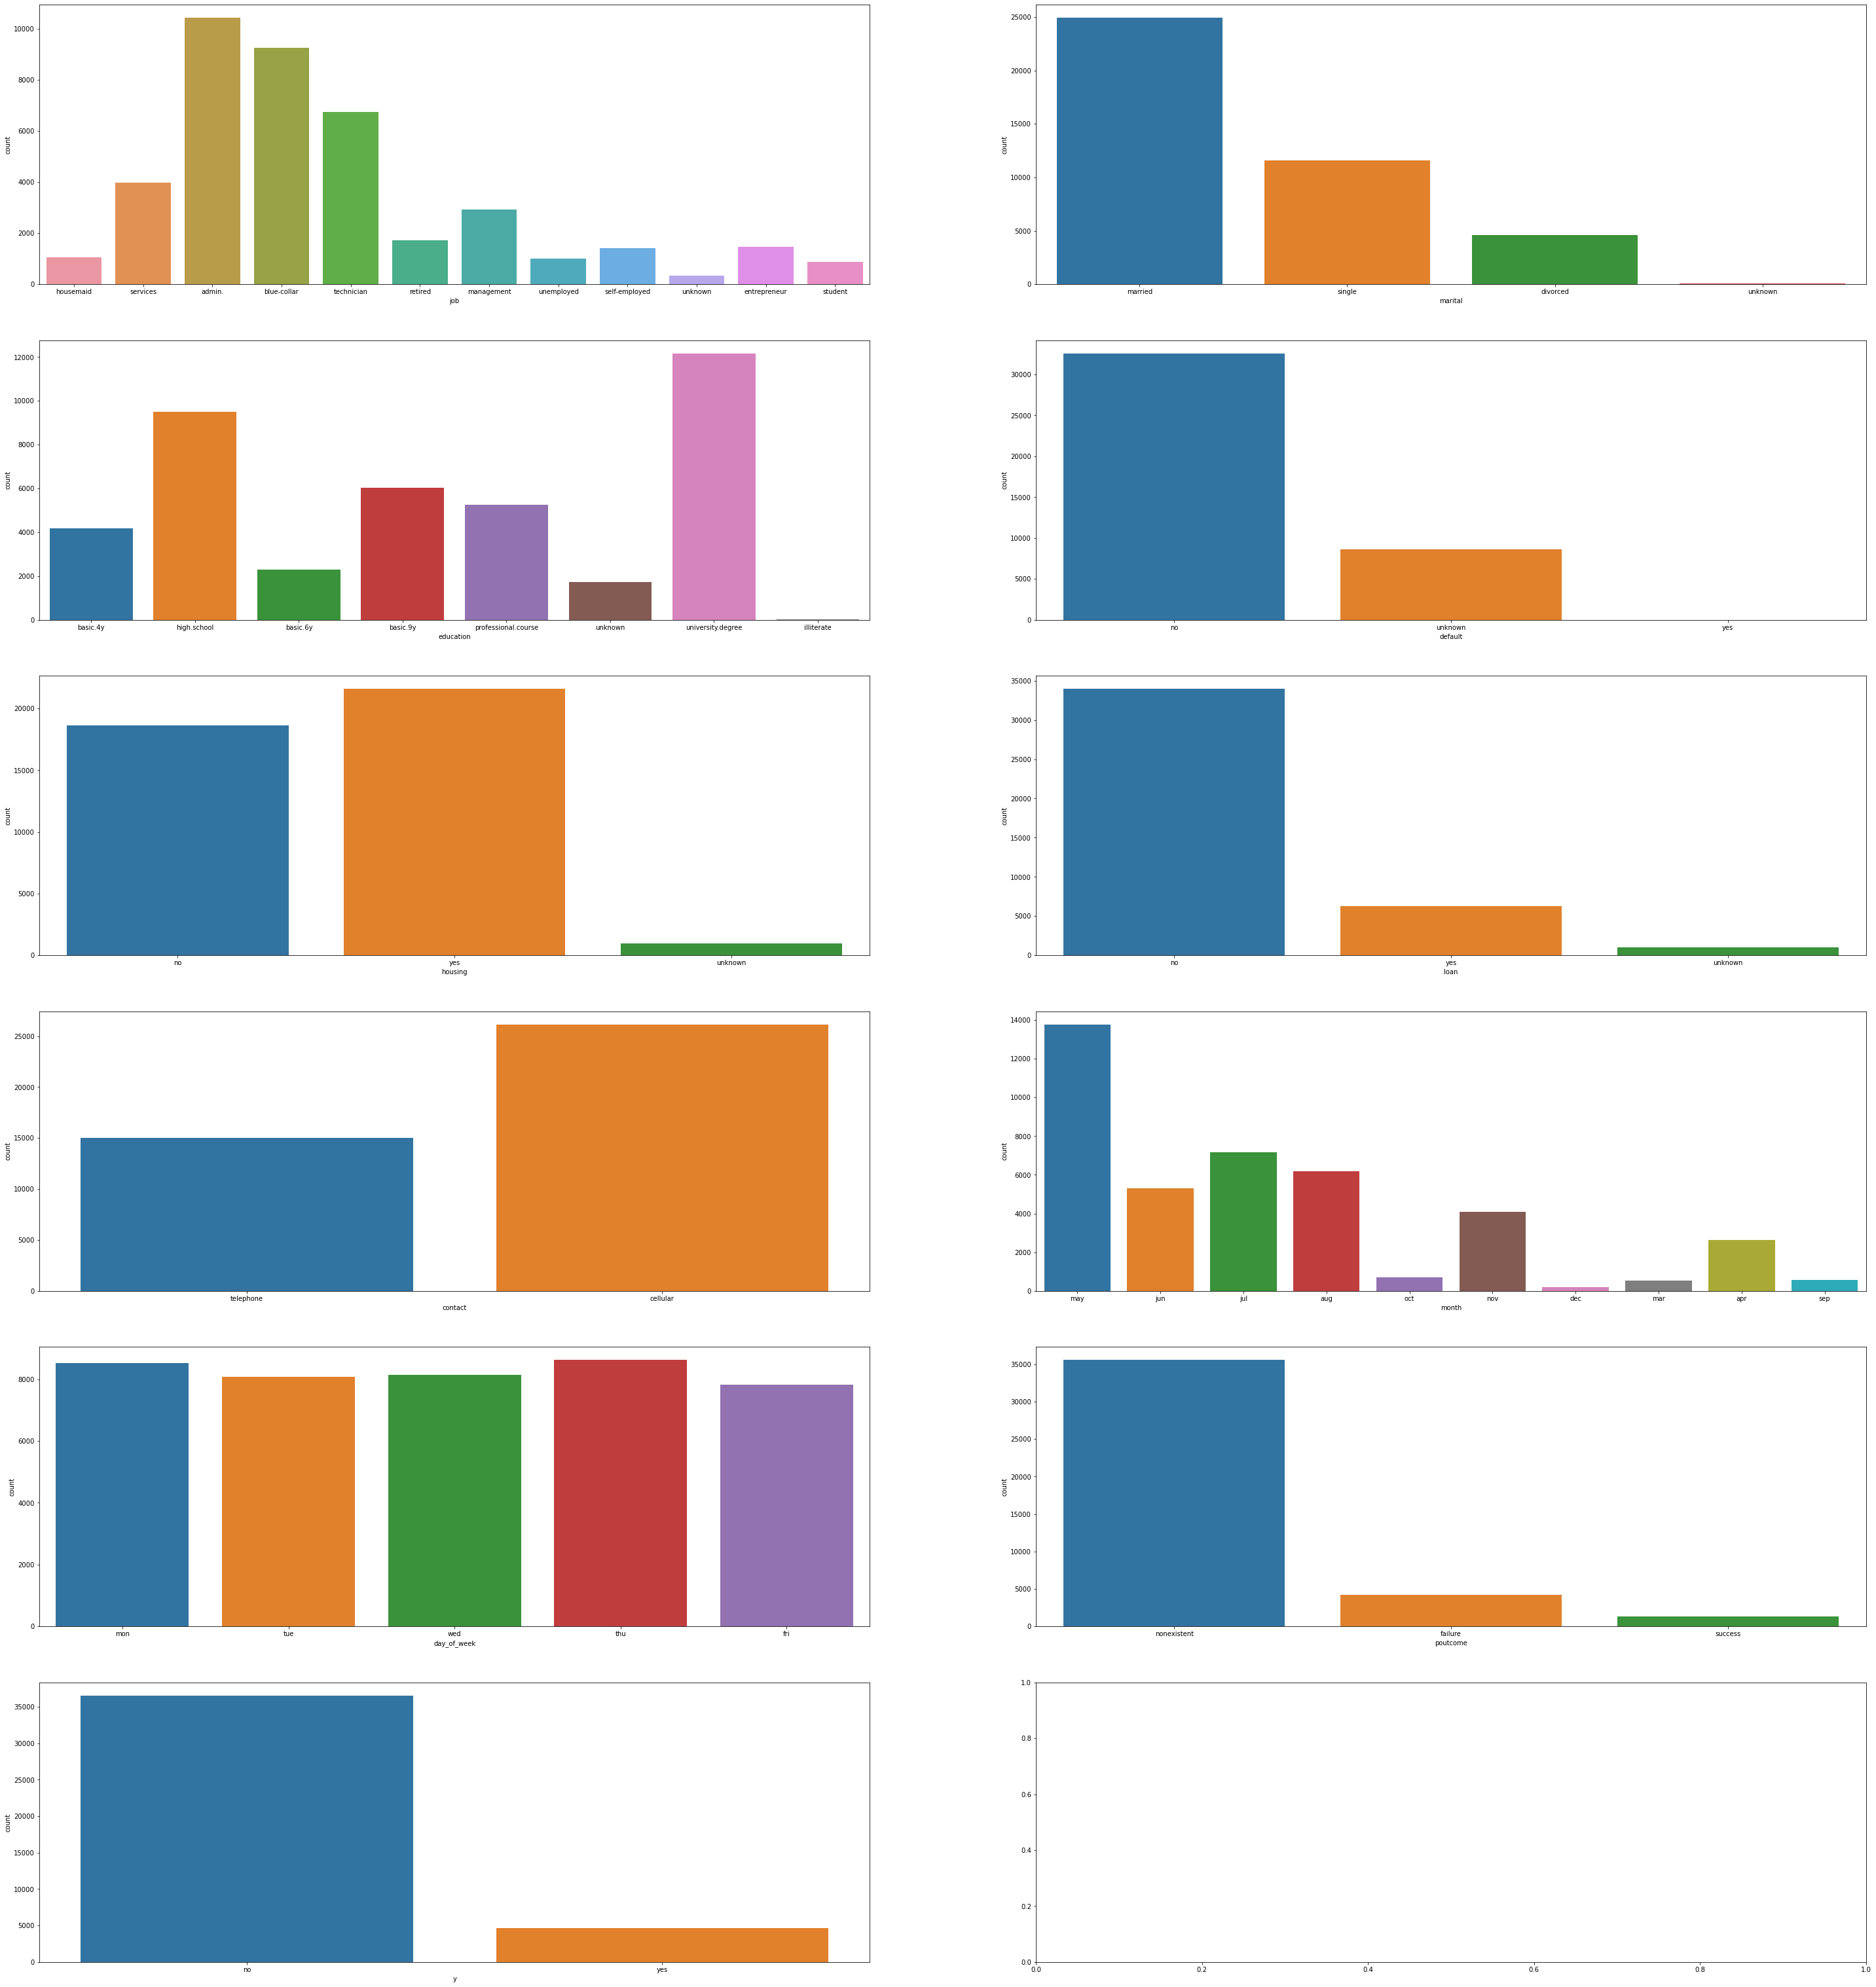

In [17]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize = (50, 55))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_categorical[variable], ax = subplot)

### Understanding the target variable

In [18]:
df1['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

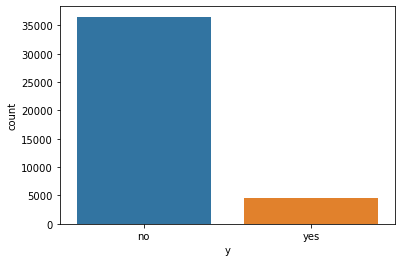

In [19]:
sns.countplot(x=df1['y'])
plt.show()

### Bi-variate Analysis
#### Checking distribution of y in categorical data:

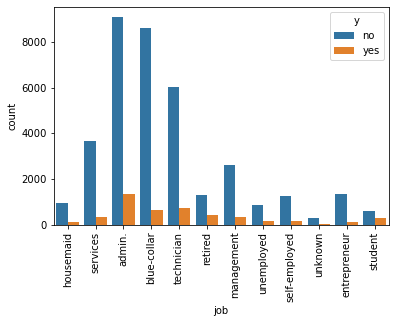

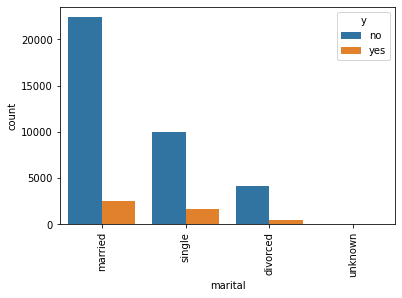

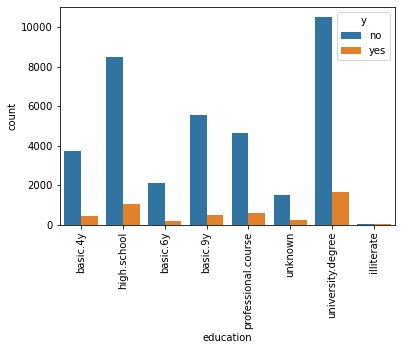

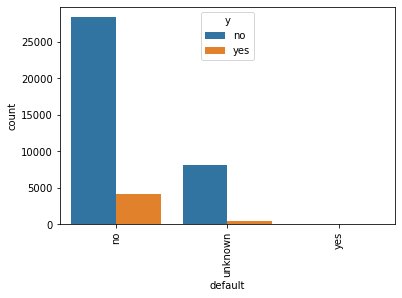

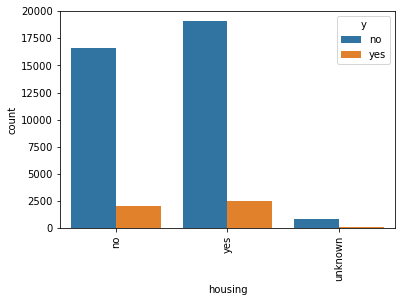

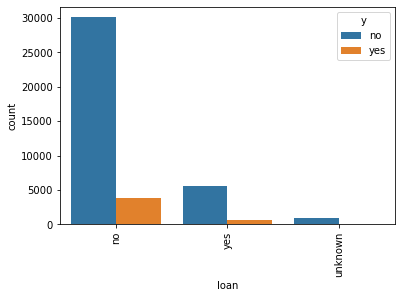

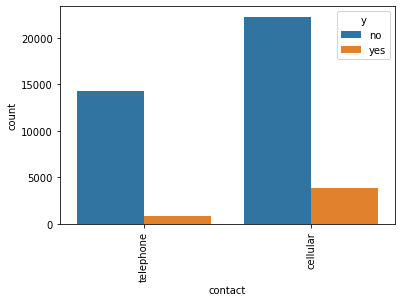

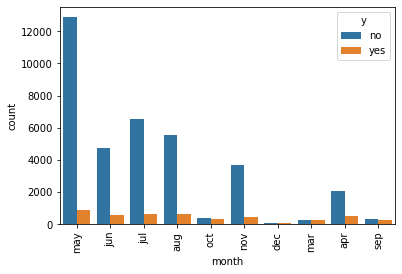

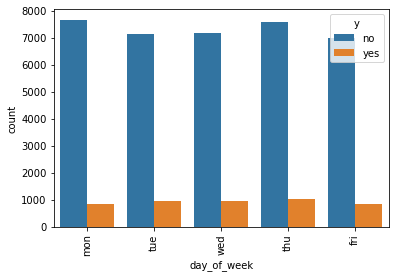

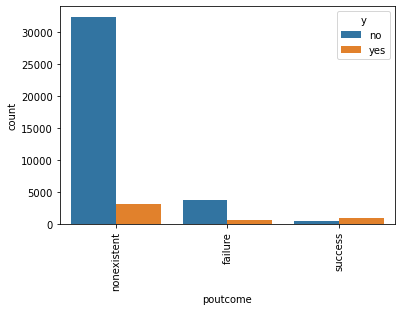

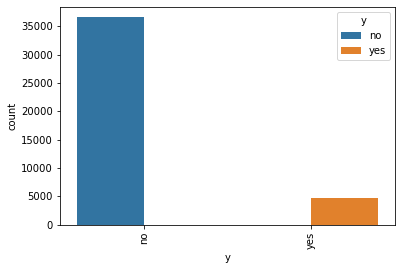

In [20]:
for i in df1_categorical:
    sns.countplot(x = df1[i], hue=df1['y'])
    plt.xticks(rotation=90)
    plt.show()

- Overall we see that most people under Categorical columns have not subscribed to term deposit

<b> Checking distibution of Categorical data with respect to Y

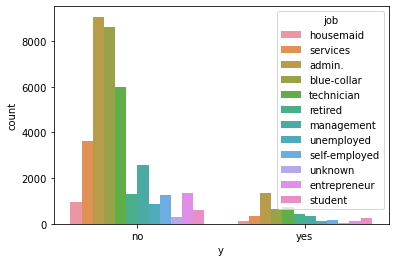

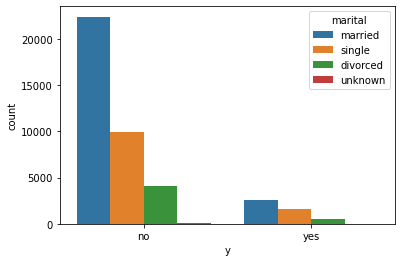

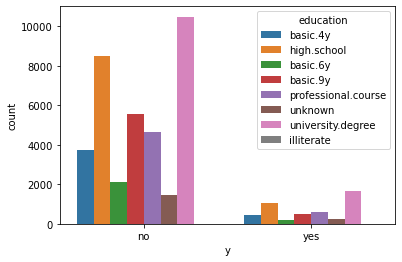

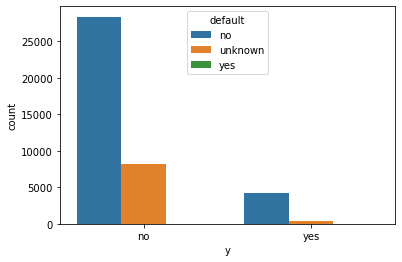

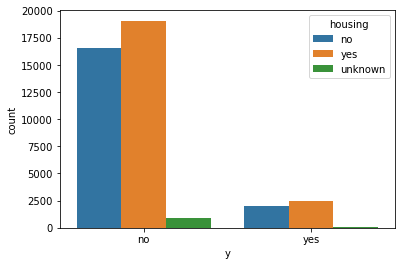

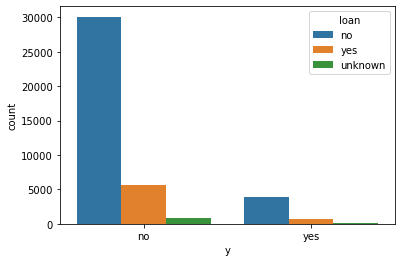

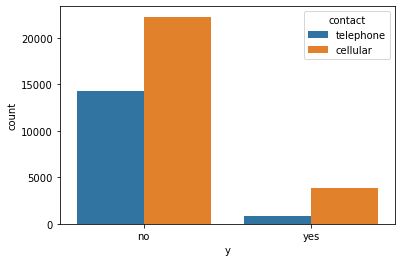

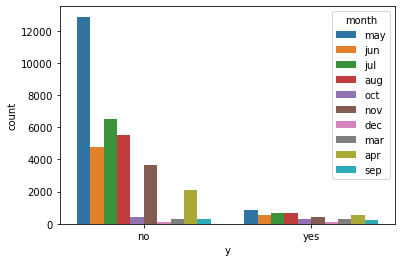

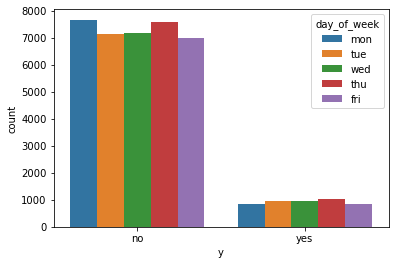

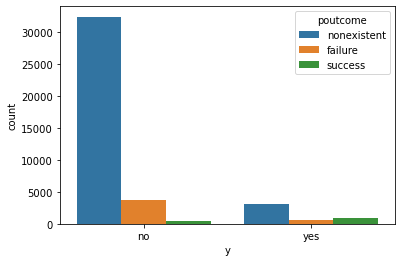

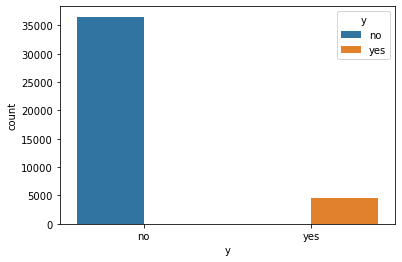

In [21]:
for i in df1_categorical:
    sns.countplot(x =df1['y'],hue=df1[i])
    plt.show()

### Transforming Data

In [22]:
df1['education'] = df1['education'].replace(['basic.9y','basic.6y','basic.4y'],
                                          'basic')

In [23]:
df1['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

### Outlier Treatment

In [24]:
df1.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,24.000,25.000,38.000,59.000,62.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,17.000,23.000,180.000,911.000,1052.500,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,1.100,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,93.749,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-41.800,-31.400,-30.100,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,4.857,4.967,4.968,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5191.000,5228.100,5228.100,5228.100,5228.100


In [25]:
def outlier_handle(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [26]:
outlier_cols = ['age','duration','campaign','previous','cons.conf.idx']
df1[outlier_cols] = df1[outlier_cols].apply(outlier_handle)

In [27]:
df1.describe(percentiles=[0.01,0.99])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.976370,254.410652,2.500291,962.464810,0.162449,0.081922,93.575720,-40.495398,3.621293,5167.034870
std,10.137591,235.211228,2.301416,186.937102,0.433295,1.570883,0.578839,4.612562,1.734437,72.251364
min,23.000000,11.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-49.500000,0.634000,4963.600000
1%,23.000000,11.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-49.500000,0.658000,4963.600000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
99%,71.000000,1271.062500,14.000000,999.000000,2.000000,1.400000,94.465000,-26.900000,4.968000,5228.100000
max,71.000000,1271.250000,14.000000,999.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Correlation

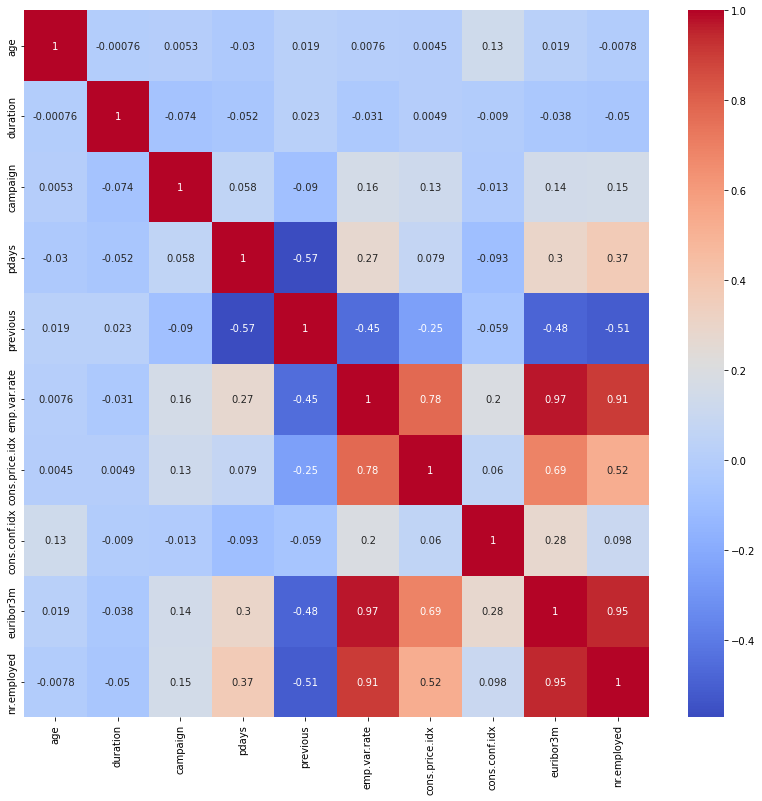

In [28]:
corr = df1.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [29]:
def high_corr(data, thresh):
    res = set()
    corr = df1.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.add(corr.columns[i])
    return list(res)

multicoll_cols = high_corr(df1,0.7)
print(multicoll_cols)
print(len(multicoll_cols))

['nr.employed', 'euribor3m', 'cons.price.idx']
3


### Inference
- Columns with multicollinearity are:<br>
['cons.price.idx', 'nr.employed', 'euribor3m']

### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb = LabelEncoder()
for i in df1_categorical:
    df1[i] = lb.fit_transform(df1[i])

In [32]:
df1.dtypes.value_counts()

int64      12
float64     9
dtype: int64

### Removing Multicollinearity

In [33]:
df2=df1.copy()

In [34]:
df2.drop(['cons.price.idx', 'nr.employed', 'euribor3m'],axis=1,inplace=True)
print(len(df2.columns))
print(df2.columns)

18
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')


In [35]:
df2.dtypes.value_counts()

int64      12
float64     6
dtype: int64

### We will now train the Models:

In [36]:
x = df2.drop('y',axis=1)
y = df2['y']
print(x.shape)
print(y.shape)
print(x.columns)

(41176, 17)
(41176,)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 17)
(10294, 17)
(30882,)
(10294,)


In [38]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [39]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,color='blue')
    plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=8)
    plt.grid()
    plt.show()

### Feature Selection

Training score 0.9437212615763227
Testing score 0.9112104138333009
Accuracy_Score 0.9112104138333009
Confusion Matrix
 [[8850  284]
 [ 630  530]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9134
           1       0.65      0.46      0.54      1160

    accuracy                           0.91     10294
   macro avg       0.79      0.71      0.74     10294
weighted avg       0.90      0.91      0.90     10294

AUC Score 0.9430951428161549


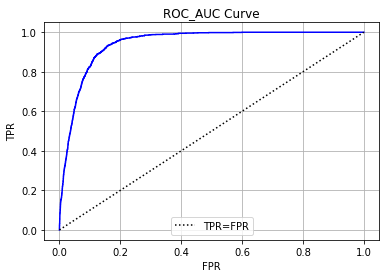

In [40]:
m1 = RandomForestClassifier(n_estimators=120,criterion='gini',
                            max_depth=12,min_samples_split=15)
gen_metrics(m1,x_train,x_test,y_train,y_test)

In [41]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_*100})
fimp_m1.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,40.426527
15,emp.var.rate,10.156853
16,cons.conf.idx,9.997897
12,pdays,9.934029
14,poutcome,5.564249
0,age,5.466153
8,month,4.833084
1,job,2.180237
11,campaign,2.072077
9,day_of_week,1.988047


In [42]:
df3=df2.copy()
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [43]:
df3.drop(['marital','loan','housing','default'],axis=1,inplace=True)

In [44]:
df3.shape

(41176, 14)

## Building the Supervised Learning models

In [45]:
x = df3.drop('y',axis=1)
y = df3['y']
print(x.shape)
print(y.shape)
print(x.columns)

(41176, 13)
(41176,)
Index(['age', 'job', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.conf.idx'],
      dtype='object')


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 13)
(10294, 13)
(30882,)
(10294,)


### Logistic Regression

Training score 0.9070008419143838
Testing score 0.9049931999222848
Accuracy_Score 0.9049931999222848
Confusion Matrix
 [[8891  243]
 [ 735  425]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9134
           1       0.64      0.37      0.46      1160

    accuracy                           0.90     10294
   macro avg       0.78      0.67      0.71     10294
weighted avg       0.89      0.90      0.89     10294

AUC Score 0.9185214110976042


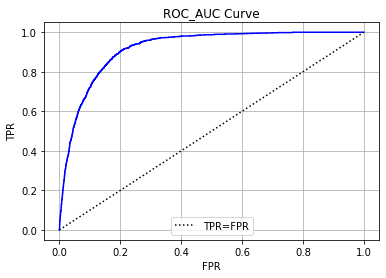

In [47]:
log_reg = LogisticRegression(max_iter=1000)
gen_metrics(log_reg,x_train,x_test,y_train,y_test)
y_pred_log_reg = log_reg.predict(x_test)

### Tabulating Result:

In [48]:
from sklearn import metrics

In [49]:
models = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy",'F-1 Score','AUC Score'])
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score


In [50]:
new_row = {"Model": "Logistic Regression",
            "Precision": metrics.precision_score(y_test,y_pred_log_reg), 
            "Recall": metrics.recall_score(y_test,y_pred_log_reg), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_log_reg), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_log_reg),
          'AUC Score':roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521


### SGD Model

Training score 0.907810374975714
Testing score 0.9050903438896445
Accuracy_Score 0.9050903438896445
Confusion Matrix
 [[8798  336]
 [ 641  519]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      9134
           1       0.61      0.45      0.52      1160

    accuracy                           0.91     10294
   macro avg       0.77      0.71      0.73     10294
weighted avg       0.90      0.91      0.90     10294

AUC Score 0.8219861563087516


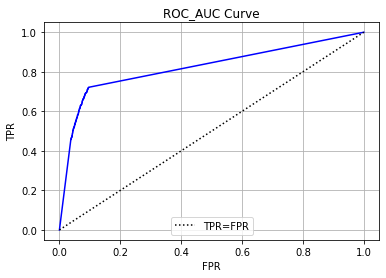

In [51]:
sgd = SGDClassifier(loss='log',random_state=50)
gen_metrics(sgd,x_train,x_test,y_train,y_test)
y_pred_sgd = sgd.predict(x_test)

In [52]:
new_row = {"Model": "SGD Model",
            "Precision": metrics.precision_score(y_test,y_pred_sgd), 
            "Recall": metrics.recall_score(y_test,y_pred_sgd), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_sgd), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_sgd),
          'AUC Score':roc_auc_score(y_test,sgd.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986


### Decision Tree

Training score 0.9140923515316366
Testing score 0.9074217991062755
Accuracy_Score 0.9074217991062755
Confusion Matrix
 [[8879  255]
 [ 698  462]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9134
           1       0.64      0.40      0.49      1160

    accuracy                           0.91     10294
   macro avg       0.79      0.69      0.72     10294
weighted avg       0.90      0.91      0.90     10294

AUC Score 0.9307394501785674


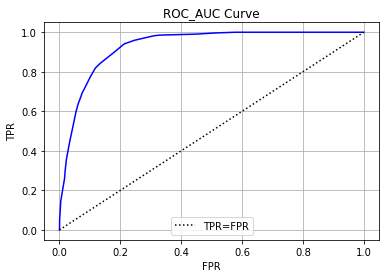

In [53]:
dt= DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 30, criterion = "entropy")
gen_metrics(dt,x_train,x_test,y_train,y_test)
y_pred_dt = dt.predict(x_test)

In [54]:
new_row = {"Model": "Decision Tree Model",
            "Precision": metrics.precision_score(y_test,y_pred_dt), 
            "Recall": metrics.recall_score(y_test,y_pred_dt), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_dt), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_dt),
          'AUC Score':roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739


### Random Forest

Training score 0.9999028560326404
Testing score 0.9095589663881873
Accuracy_Score 0.9095589663881873
Confusion Matrix
 [[8782  352]
 [ 579  581]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9134
           1       0.62      0.50      0.56      1160

    accuracy                           0.91     10294
   macro avg       0.78      0.73      0.75     10294
weighted avg       0.90      0.91      0.91     10294

AUC Score 0.9391527392916198


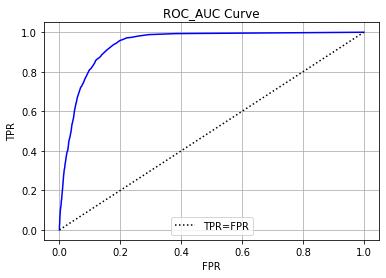

In [55]:
rf= RandomForestClassifier()
gen_metrics(rf,x_train,x_test,y_train,y_test)
y_pred_rf = rf.predict(x_test)

In [56]:
new_row = {"Model": "Random Forest Model",
            "Precision": metrics.precision_score(y_test,y_pred_rf), 
            "Recall": metrics.recall_score(y_test,y_pred_rf), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_rf), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_rf),
          'AUC Score':roc_auc_score(y_test,rf.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153


### AdaBoost

Training score 0.9257496276147917
Testing score 0.9033417524771712
Accuracy_Score 0.9033417524771712
Confusion Matrix
 [[8730  404]
 [ 591  569]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9134
           1       0.58      0.49      0.53      1160

    accuracy                           0.90     10294
   macro avg       0.76      0.72      0.74     10294
weighted avg       0.90      0.90      0.90     10294

AUC Score 0.9310713382360712


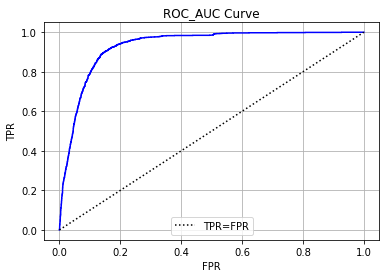

In [57]:
dt1 = DecisionTreeClassifier(max_depth=3)
ada= AdaBoostClassifier(dt1,n_estimators=60,learning_rate=1)
gen_metrics(ada,x_train,x_test,y_train,y_test)
y_pred_ada= ada.predict(x_test)

In [58]:
new_row = {"Model": "AdaBoost Model",
            "Precision": metrics.precision_score(y_test,y_pred_ada), 
            "Recall": metrics.recall_score(y_test,y_pred_ada), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_ada), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_ada),
          'AUC Score':roc_auc_score(y_test,ada.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071


### XGBoost

Training score 0.9591995337089567
Testing score 0.9097532543229065
Accuracy_Score 0.9097532543229065
Confusion Matrix
 [[8762  372]
 [ 557  603]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9134
           1       0.62      0.52      0.56      1160

    accuracy                           0.91     10294
   macro avg       0.78      0.74      0.76     10294
weighted avg       0.90      0.91      0.91     10294

AUC Score 0.941556509215285


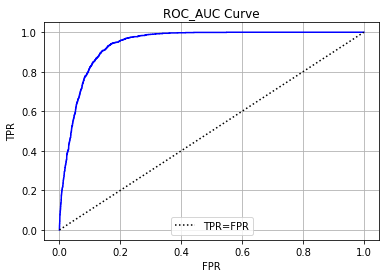

In [59]:
xgb= XGBClassifier()
gen_metrics(xgb,x_train,x_test,y_train,y_test)
y_pred_xgb= xgb.predict(x_test)

In [60]:
new_row = {"Model": "XGBoost Model",
            "Precision": metrics.precision_score(y_test,y_pred_xgb), 
            "Recall": metrics.recall_score(y_test,y_pred_xgb), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_xgb), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_xgb),
          'AUC Score':roc_auc_score(y_test,xgb.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071
5,XGBoost Model,0.618462,0.519828,0.909753,0.564871,0.941557


### KNN

Training score 0.9197590829609481
Testing score 0.900524577423742
Accuracy_Score 0.900524577423742
Confusion Matrix
 [[8911  223]
 [ 801  359]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9134
           1       0.62      0.31      0.41      1160

    accuracy                           0.90     10294
   macro avg       0.77      0.64      0.68     10294
weighted avg       0.88      0.90      0.89     10294

AUC Score 0.8411499664006403


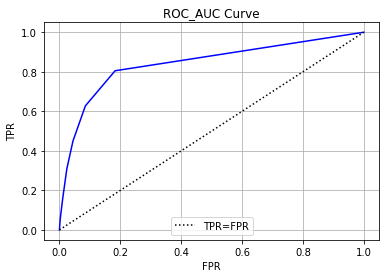

In [61]:
knn = KNeighborsClassifier(n_neighbors=6,p=2) 
gen_metrics(knn,x_train,x_test,y_train,y_test)
y_pred_knn= knn.predict(x_test)

In [62]:
new_row = {"Model": "KNN Model",
            "Precision": metrics.precision_score(y_test,y_pred_knn), 
            "Recall": metrics.recall_score(y_test,y_pred_knn), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_knn), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_knn),
          'AUC Score':roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071
5,XGBoost Model,0.618462,0.519828,0.909753,0.564871,0.941557
6,KNN Model,0.616838,0.309483,0.900525,0.412170,0.841150


### SVM

#### Linear

Training score 0.8996826630399586
Testing score 0.8976102584029532
Accuracy_Score 0.8976102584029532
Confusion Matrix
 [[8907  227]
 [ 827  333]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      9134
           1       0.59      0.29      0.39      1160

    accuracy                           0.90     10294
   macro avg       0.75      0.63      0.67     10294
weighted avg       0.88      0.90      0.88     10294

AUC Score 0.8287235357852056


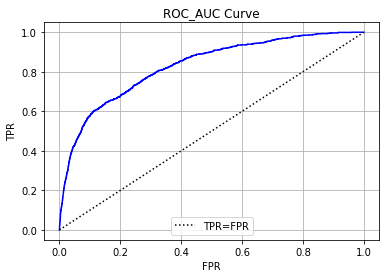

In [63]:
svc=SVC(kernel='linear',C=1,probability=True)
gen_metrics(svc,x_train,x_test,y_train,y_test)
y_pred_svc= svc.predict(x_test)

In [64]:
new_row = {"Model": "SVM Linear",
            "Precision": metrics.precision_score(y_test,y_pred_svc), 
            "Recall": metrics.recall_score(y_test,y_pred_svc), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_svc), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_svc),
          'AUC Score':roc_auc_score(y_test,svc.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071
5,XGBoost Model,0.618462,0.519828,0.909753,0.564871,0.941557
6,KNN Model,0.616838,0.309483,0.900525,0.412170,0.841150
7,SVM Linear,0.594643,0.287069,0.897610,0.387209,0.828724


#### Polynomial

Training score 0.9015283984197915
Testing score 0.8980959782397513
Accuracy_Score 0.8980959782397513
Confusion Matrix
 [[8919  215]
 [ 834  326]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.60      0.28      0.38      1160

    accuracy                           0.90     10294
   macro avg       0.76      0.63      0.66     10294
weighted avg       0.88      0.90      0.88     10294

AUC Score 0.868884963720242


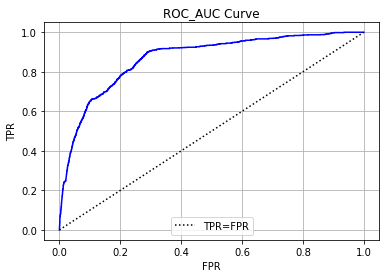

In [65]:
svcp=SVC(kernel='poly',degree=3,probability=True)
gen_metrics(svcp,x_train,x_test,y_train,y_test)
y_pred_svcp= svcp.predict(x_test)

In [66]:
new_row = {"Model": "SVM Poly",
            "Precision": metrics.precision_score(y_test,y_pred_svcp), 
            "Recall": metrics.recall_score(y_test,y_pred_svcp), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_svcp), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_svcp),
          'AUC Score':roc_auc_score(y_test,svcp.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071
5,XGBoost Model,0.618462,0.519828,0.909753,0.564871,0.941557
6,KNN Model,0.616838,0.309483,0.900525,0.412170,0.841150
7,SVM Linear,0.594643,0.287069,0.897610,0.387209,0.828724
8,SVM Poly,0.602588,0.281034,0.898096,0.383304,0.868885


### Grid Search CV

In [67]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [71]:
hparams_svc = {'kernel':['linear','poly'],
               'C':[0.01,0.1,1,10],
               'degree':[1,2,3]}
print(hparams_svc)

{'kernel': ['linear', 'poly'], 'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}


Training score 0.9016579237096043
Testing score 0.8983874101418302
Accuracy_Score 0.8983874101418302
Confusion Matrix
 [[8918  216]
 [ 830  330]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.60      0.28      0.39      1160

    accuracy                           0.90     10294
   macro avg       0.76      0.63      0.67     10294
weighted avg       0.88      0.90      0.88     10294

AUC Score 0.7128933767734045


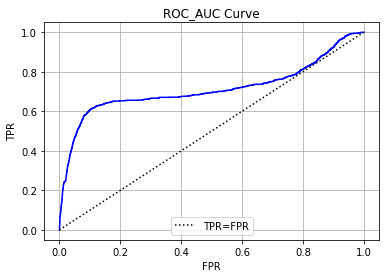

In [72]:
model = SVC(probability=True)
rs = RandomizedSearchCV(model,param_distributions=hparams_svc,
                        scoring='accuracy')
gen_metrics(rs,x_train,x_test,y_train,y_test)
y_pred_rs= rs.predict(x_test)

In [73]:
new_row = {"Model": "SVM Grid Search CV",
            "Precision": metrics.precision_score(y_test,y_pred_rs), 
            "Recall": metrics.recall_score(y_test,y_pred_rs), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_rs), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_rs),
          'AUC Score':roc_auc_score(y_test,rs.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.636228,0.366379,0.904993,0.464989,0.918521
1,SGD Model,0.607018,0.447414,0.905090,0.515136,0.821986
2,Decision Tree Model,0.644351,0.398276,0.907422,0.492275,0.930739
3,Random Forest Model,0.622722,0.500862,0.909559,0.555184,0.939153
4,AdaBoost Model,0.584789,0.490517,0.903342,0.533521,0.931071
5,XGBoost Model,0.618462,0.519828,0.909753,0.564871,0.941557
6,KNN Model,0.616838,0.309483,0.900525,0.412170,0.841150
7,SVM Linear,0.594643,0.287069,0.897610,0.387209,0.828724
8,SVM Poly,0.602588,0.281034,0.898096,0.383304,0.868885
9,SVM Grid Search CV,0.604396,0.284483,0.898387,0.386870,0.712893


### Conclusion

- From the above table we can see that models like: XGBoost,Random Forest & AdaBoost give the best AUC scores.
- All models have good accuracy score (about 89%)